In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from scipy import stats

In [6]:
sales = pd.read_csv('shop_sales.csv')

In [8]:
sales

,item_id,store_id,date_id,cnt
0,STORE_2_085,STORE_2,1,3
1,STORE_2_085,STORE_2,2,8
2,STORE_2_085,STORE_2,3,0
3,STORE_2_085,STORE_2,4,3
4,STORE_2_085,STORE_2,5,0
...,...,...,...,...
81850,STORE_1_727,STORE_1,1815,2
81851,STORE_1_727,STORE_1,1816,3
81852,STORE_1_727,STORE_1,1817,1
81853,STORE_1_727,STORE_1,1818,4


In [9]:
# 3 магазина - нужно выбрать 1 из 3
stores = list(sales.store_id.unique())
print(stores)

['STORE_2', 'STORE_3', 'STORE_1']


## Выбираю STORE_1

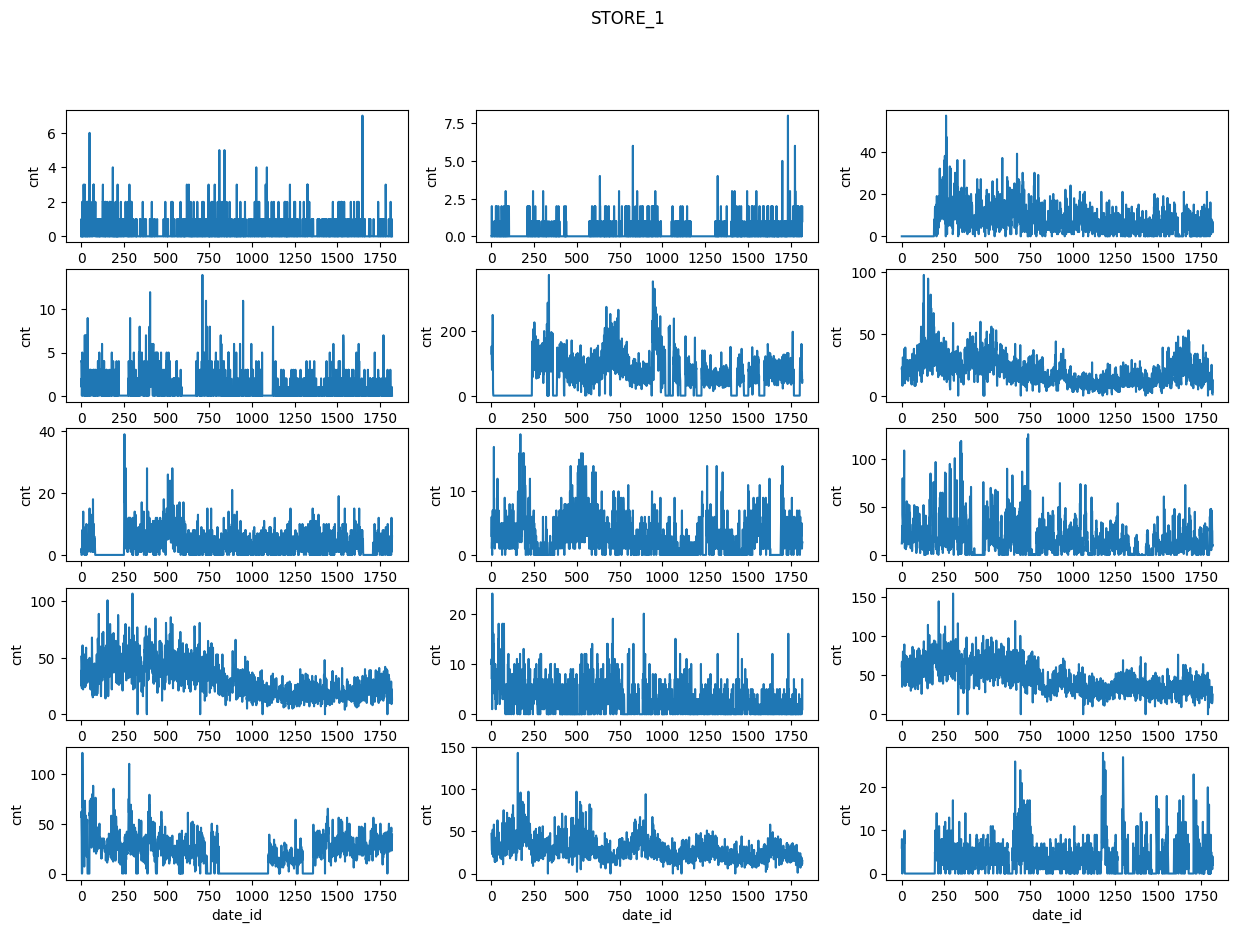

In [11]:
fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(sales[sales.store_id=='STORE_1'].item_id.unique()):
    sns.lineplot(data = sales[(sales.item_id==art) & (sales.store_id=='STORE_1')],
                 x='date_id',y='cnt',ax = ax[i//3][i%3])
plt.suptitle("STORE_1");

In [14]:
#данные о датах и праздниках (соединяется с продажами по полю date_id)
calendar = pd.read_csv('shop_sales_dates.csv')

In [16]:
calendar.head(4)

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,1,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,2,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,3,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,0,1,1


In [35]:
calendar['CASHBACK_STORE_3'].value_counts()

CASHBACK_STORE_3
0    1219
1     600
Name: count, dtype: int64

In [36]:
#данные о датах и праздниках (соединяется с датами по полю wm_yr_wk)
prices = pd.read_csv('shop_sales_prices.csv')

In [37]:
prices

,store_id,item_id,wm_yr_wk,sell_price
0,STORE_2,STORE_2_085,11101,1.00
1,STORE_2,STORE_2_043,11101,2.88
2,STORE_2,STORE_2_054,11101,2.28
3,STORE_2,STORE_2_090,11101,1.25
4,STORE_2,STORE_2_252,11101,1.48
...,...,...,...,...
11136,STORE_1,STORE_1_584,11551,1.00
11137,STORE_1,STORE_1_586,11551,1.68
11138,STORE_1,STORE_1_587,11551,2.48
11139,STORE_1,STORE_1_714,11551,1.58


In [39]:
prices['sell_price'].max()

6.71